In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline

In [2]:
kmean=pd.read_csv('helmetcsv.csv')
kmean_dummies = pd.get_dummies(data = kmean, columns = list(kmean.select_dtypes('object')))

In [3]:
from sklearn.preprocessing import StandardScaler
dumscaled=pd.DataFrame(StandardScaler().fit_transform(kmean_dummies.copy()),columns=kmean_dummies.columns)

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=101)
dums_pca=pd.DataFrame(pca.fit_transform(dumscaled),columns=['PC1','PC2'])

In [5]:
pca.explained_variance_ratio_

array([0.00713848, 0.00694556])

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=101)
kmeans.fit(dums_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=.4,min_samples=2)
dbscan.fit(dums_pca)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [8]:
from hdbscan import HDBSCAN
hdbscan=HDBSCAN(min_cluster_size=2,min_samples=25,gen_min_span_tree=True)
hdbscan.fit(dums_pca)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=25, p=None,
        prediction_data=False)

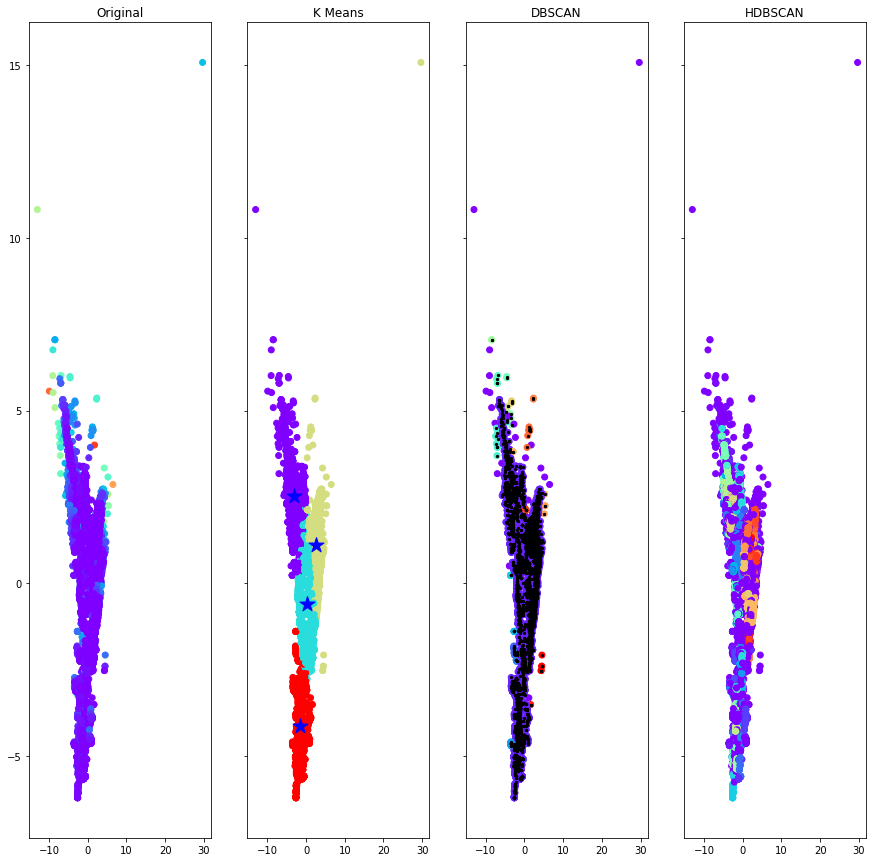

In [9]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True,figsize=(15,15))
ax2.set_title('K Means')
ax2.scatter(dums_pca['PC1'],dums_pca['PC2'],c=kmeans.labels_,cmap='rainbow')

centroids=kmeans.cluster_centers_
ax2.scatter(centroids[:,0],centroids[:,1],marker='*',c='b',s=250)

ax1.set_title("Original")
ax1.scatter(dums_pca['PC1'],dums_pca['PC2'],c=kmean_dummies['Total Helmet'],cmap='rainbow')

core=dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(dums_pca['PC1'],dums_pca['PC2'],c=dbscan.labels_,cmap='rainbow')
ax3.scatter(core[:,0],core[:,1],marker='o',c='black',s=5)

ax4.set_title('HDBSCAN')
ax4.scatter(dums_pca['PC1'],dums_pca['PC2'],c=hdbscan.labels_,cmap='rainbow')

## Evaluation K means with Elbow Method

In [10]:
inertia_list = []

for i in range(1,150):
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dums_pca)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

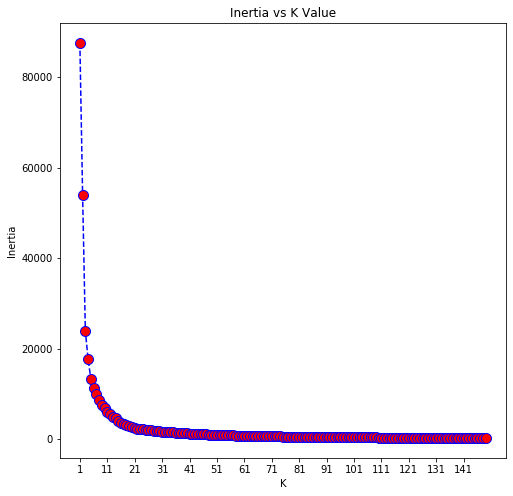

In [11]:
plt.figure(figsize = (8,8))
plt.plot(range(1,150), inertia_list, color = 'blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red',
         markersize = 10)
plt.title('Inertia vs K Value')
plt.xticks(range(1,150, 10))
plt.xlabel('K')
plt.ylabel('Inertia')

## Evaluation K means with Silhoutte Index

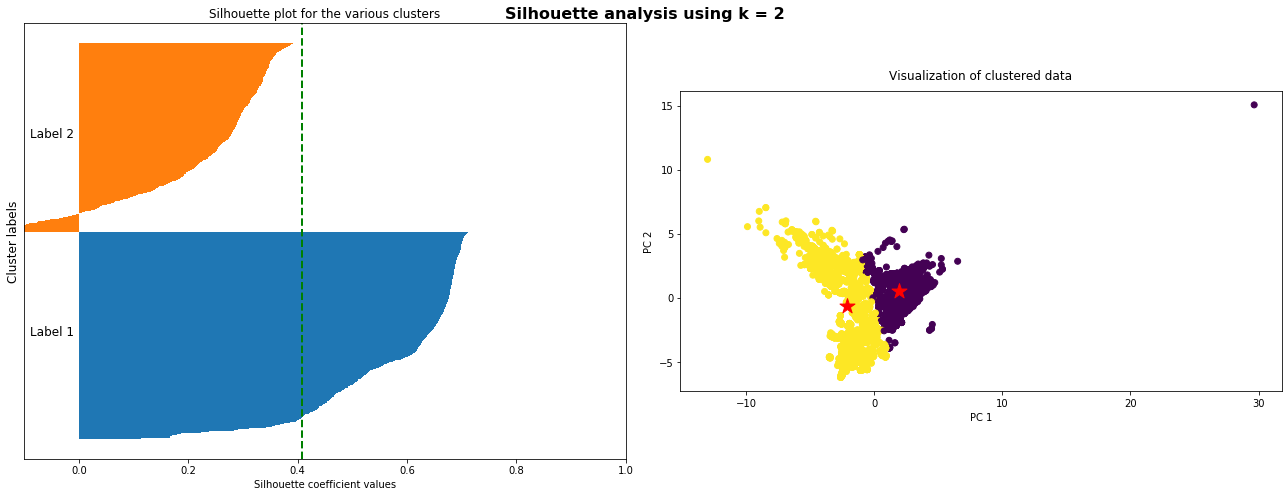

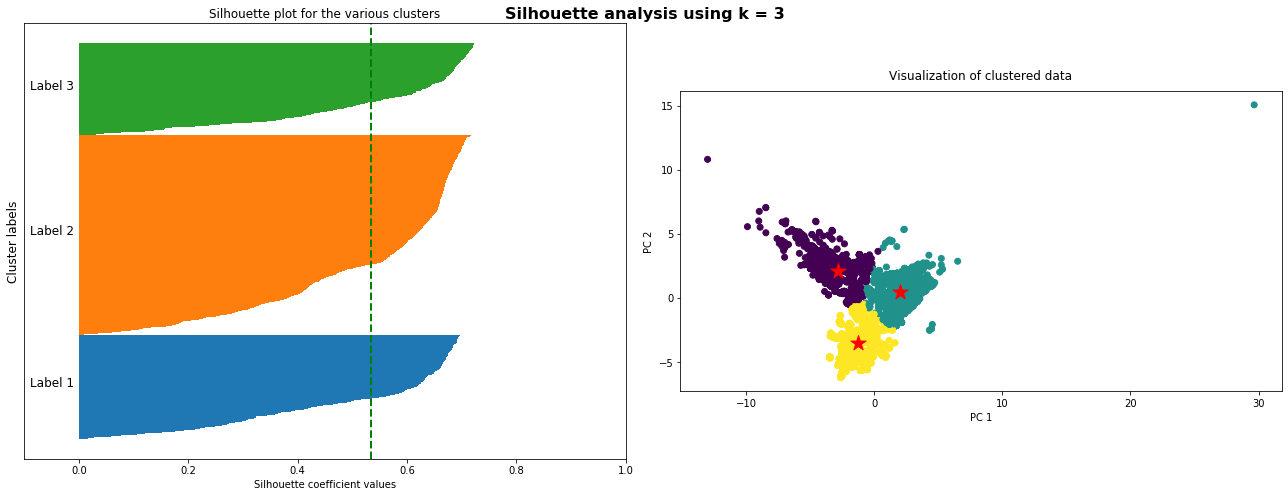

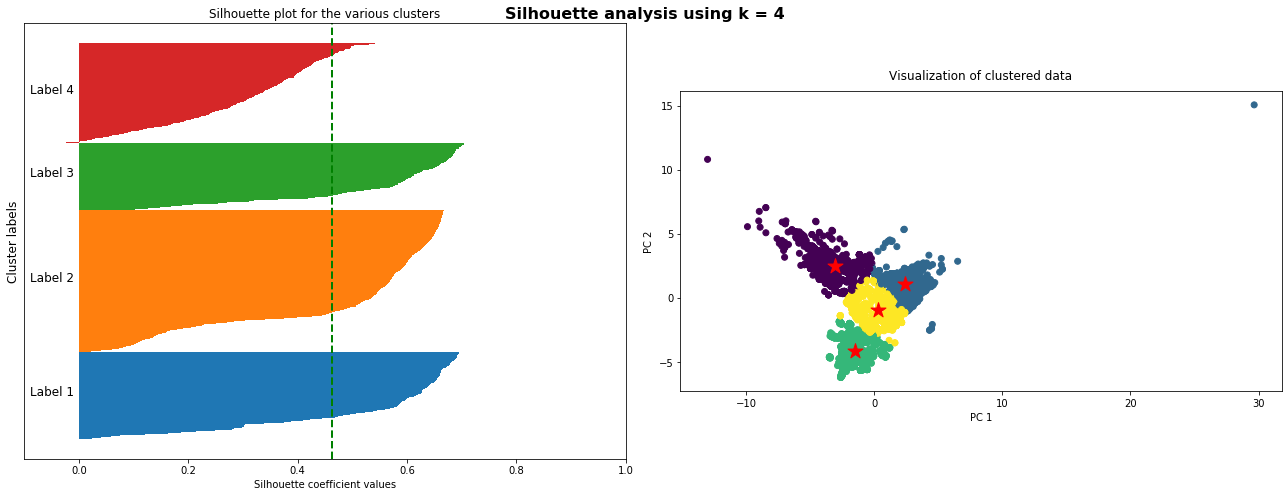

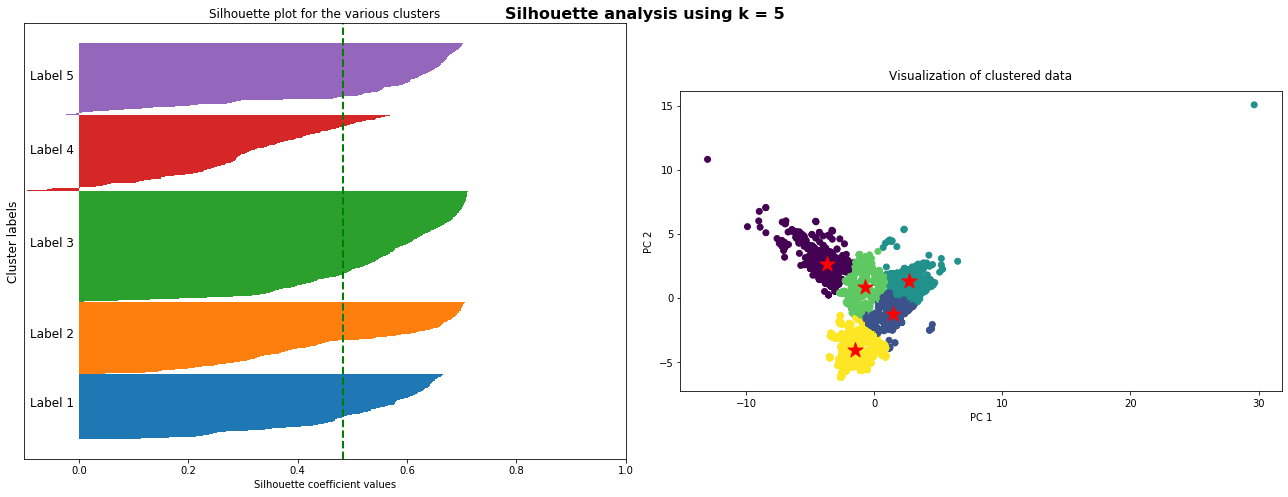

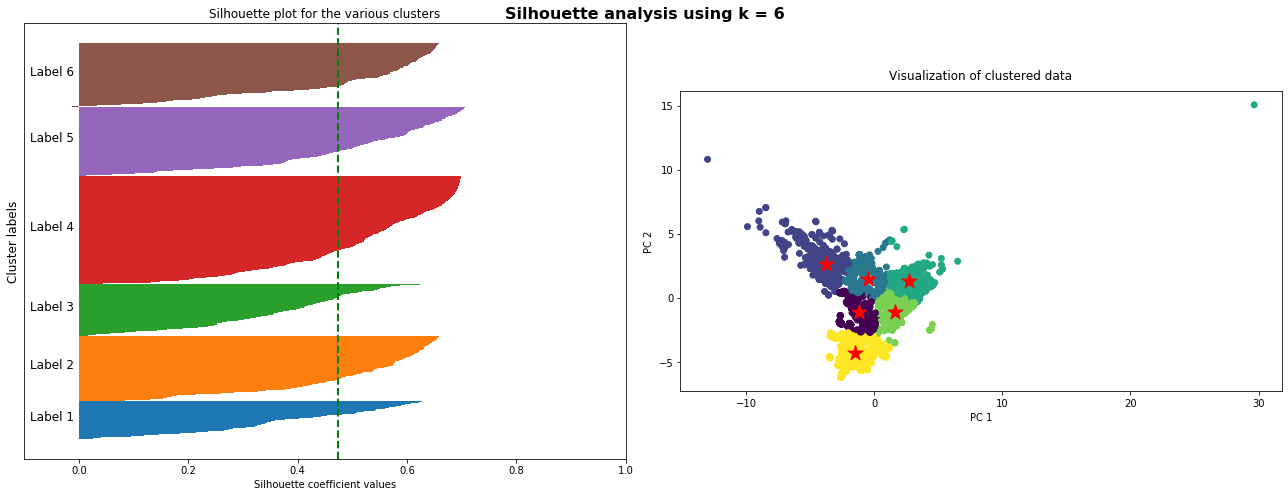

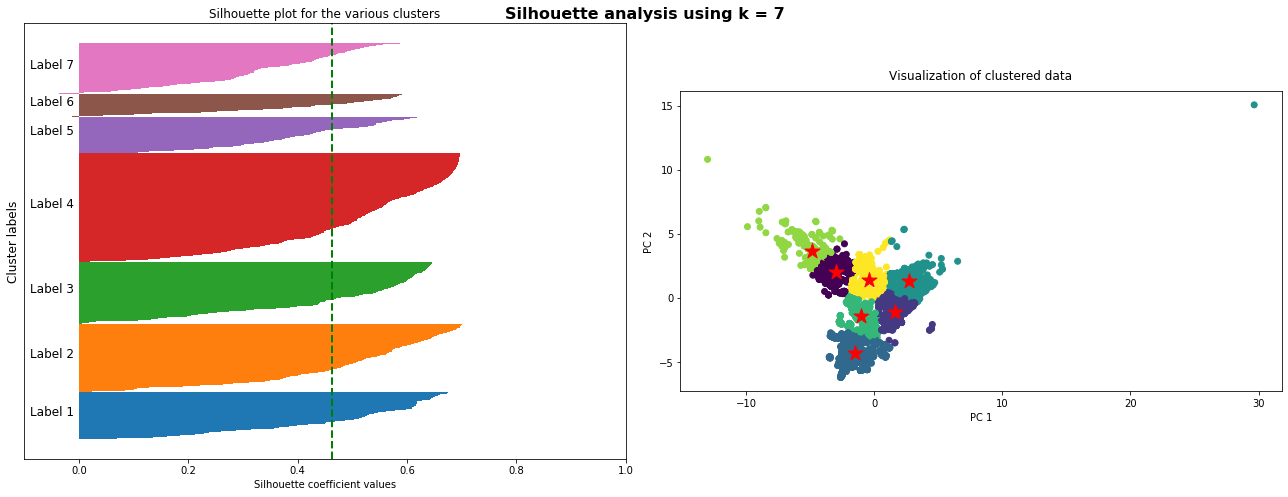

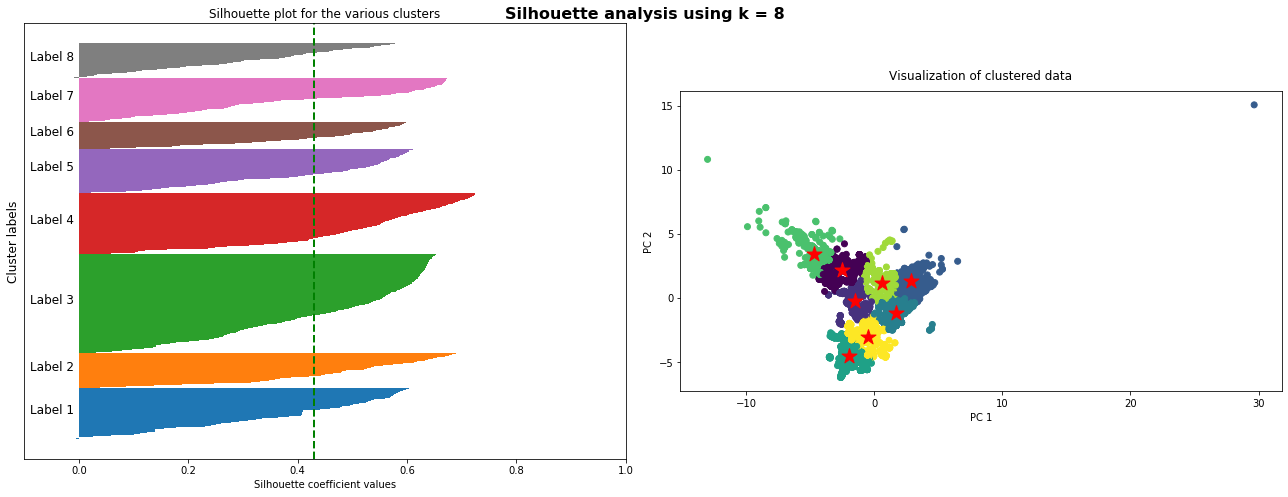

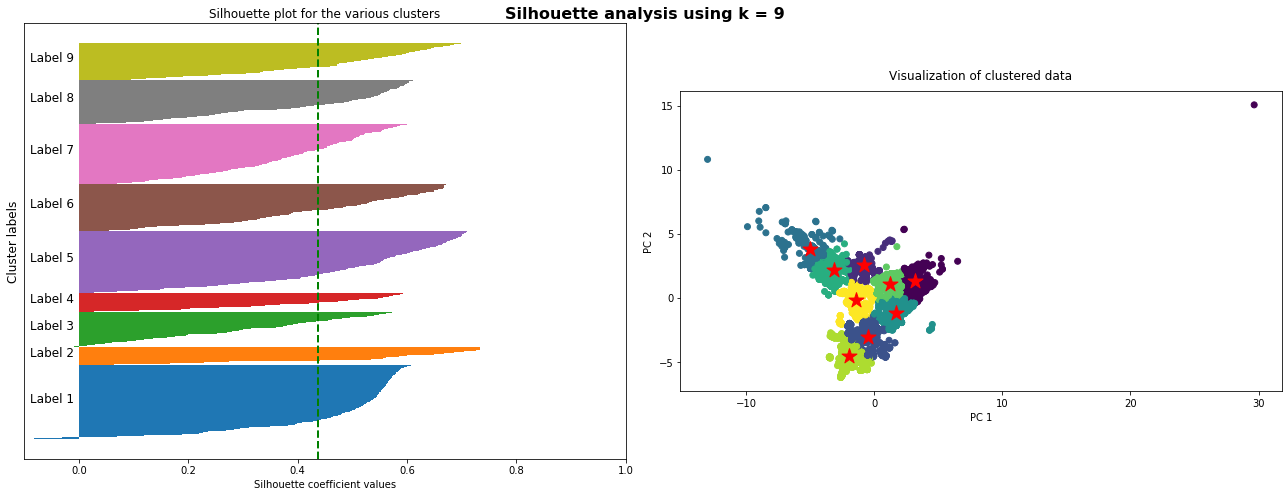

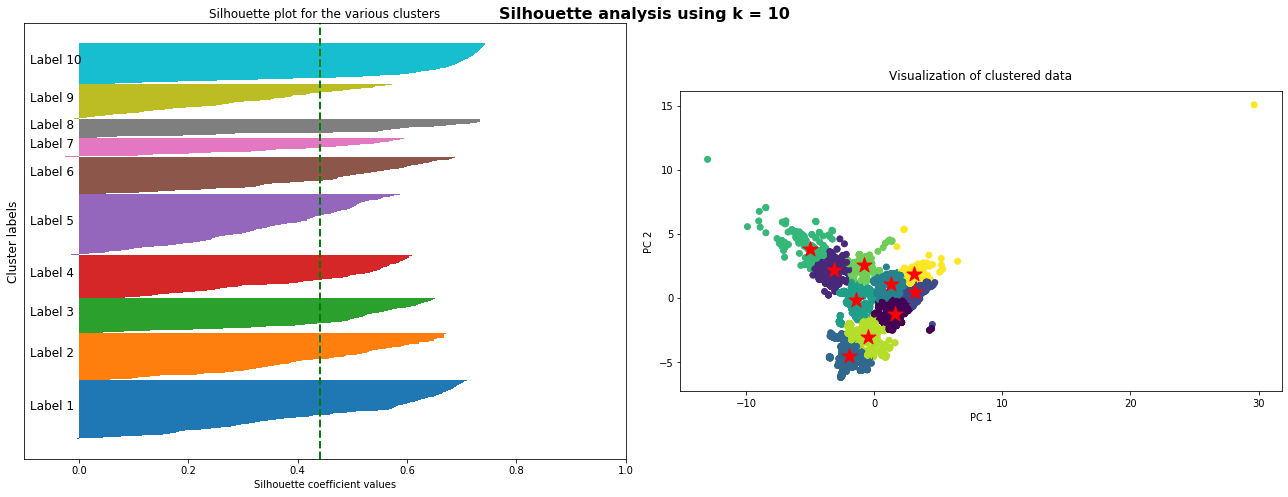

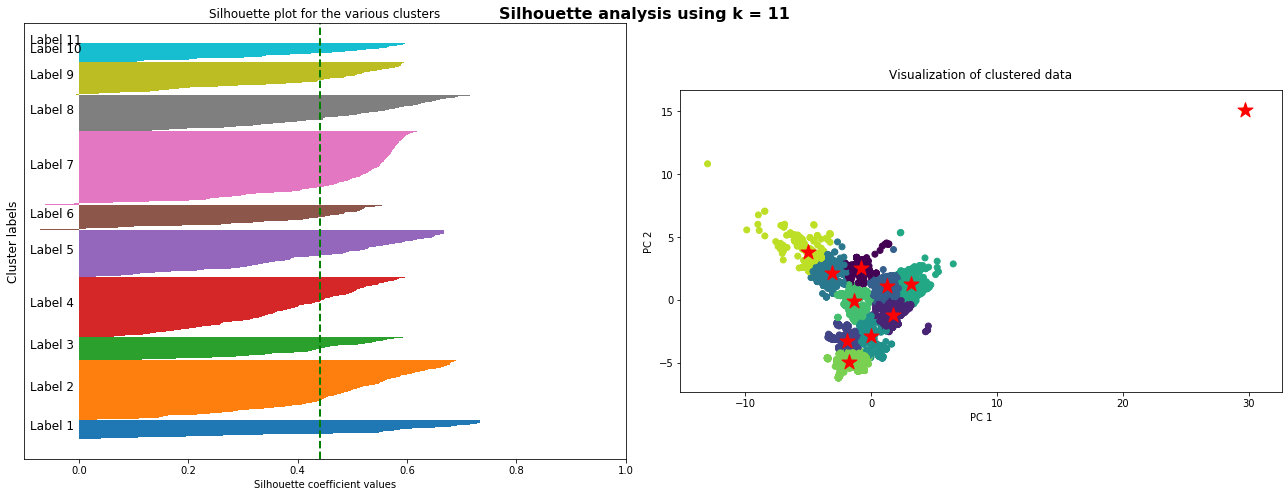

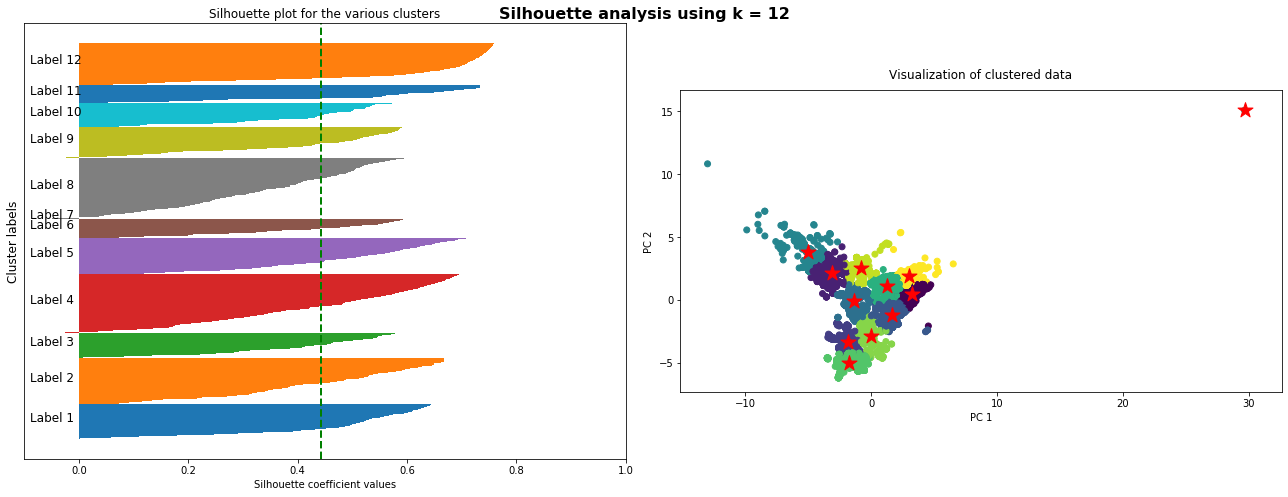

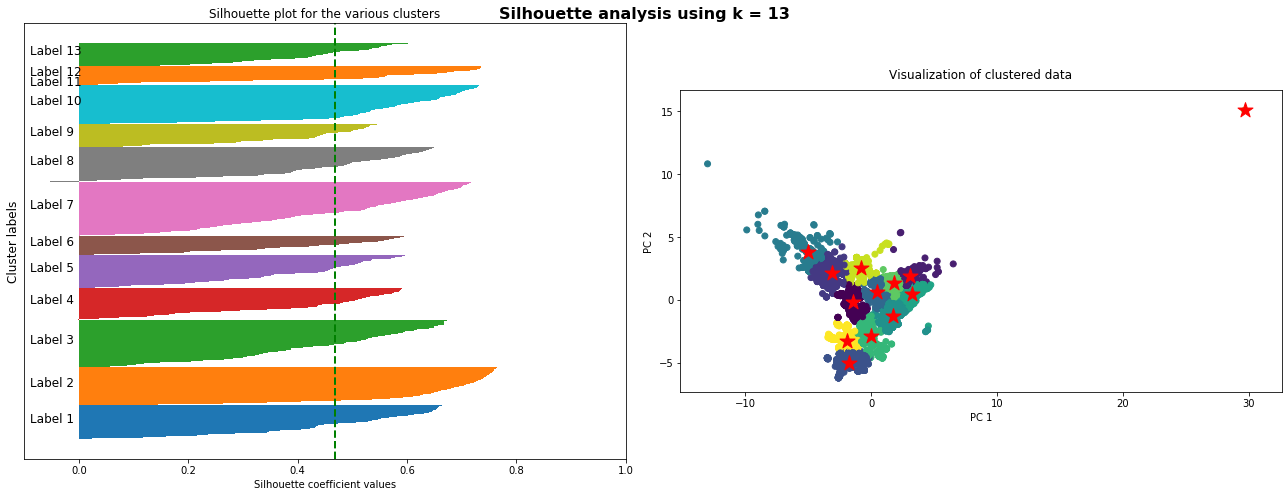

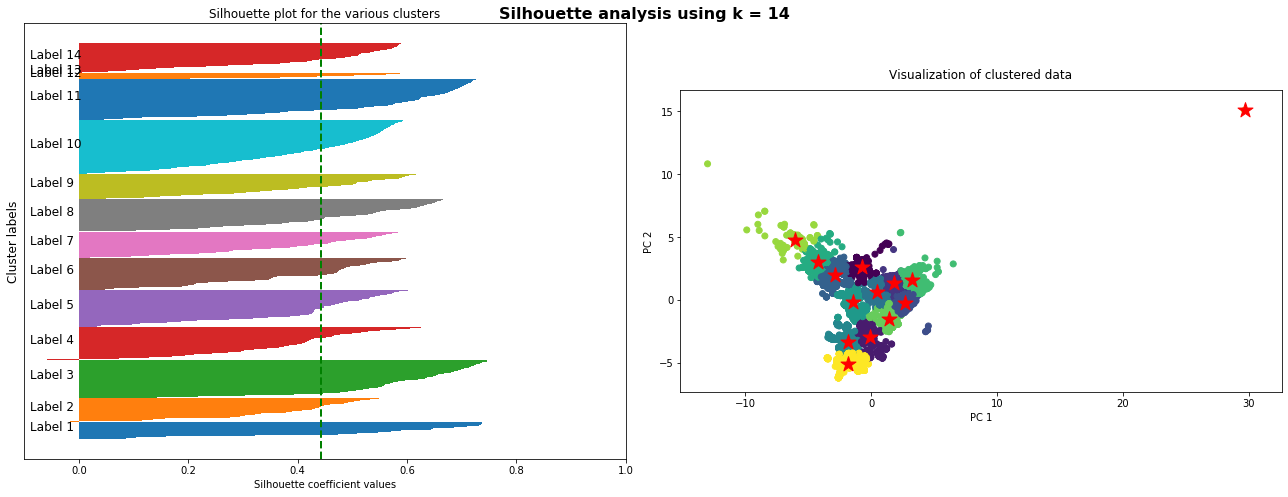

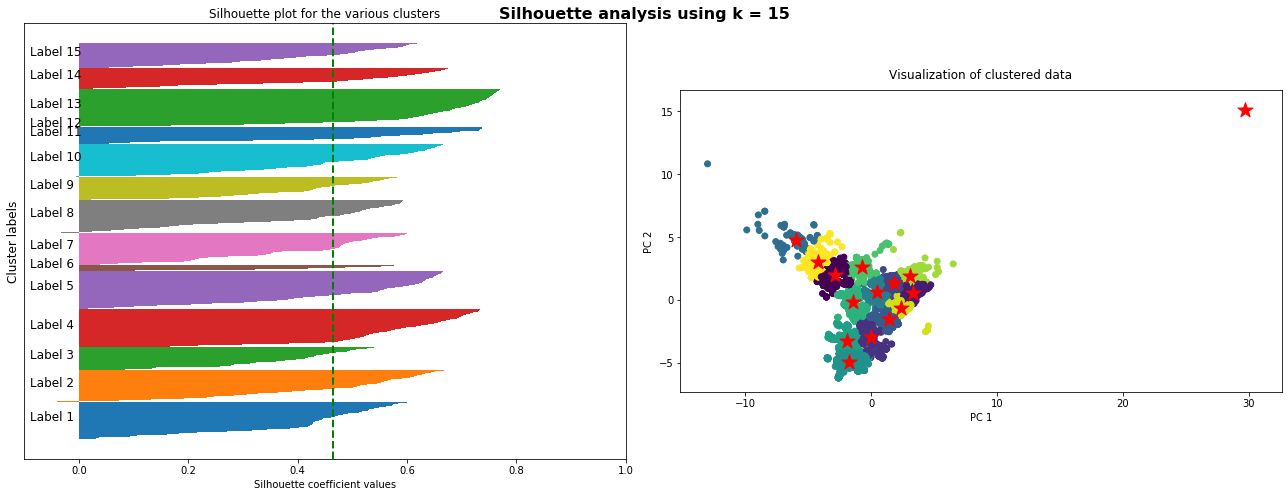

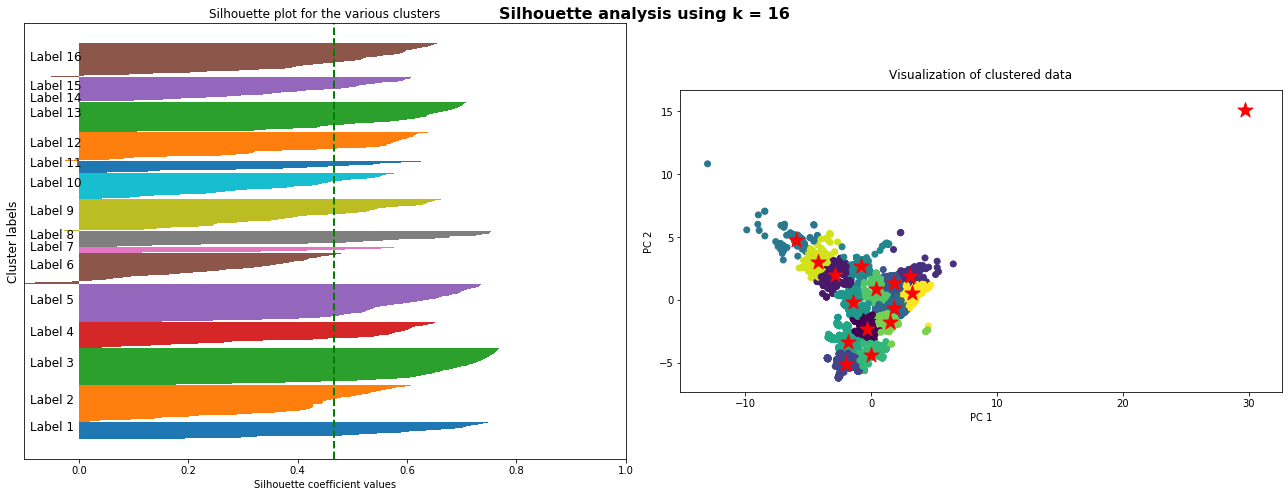

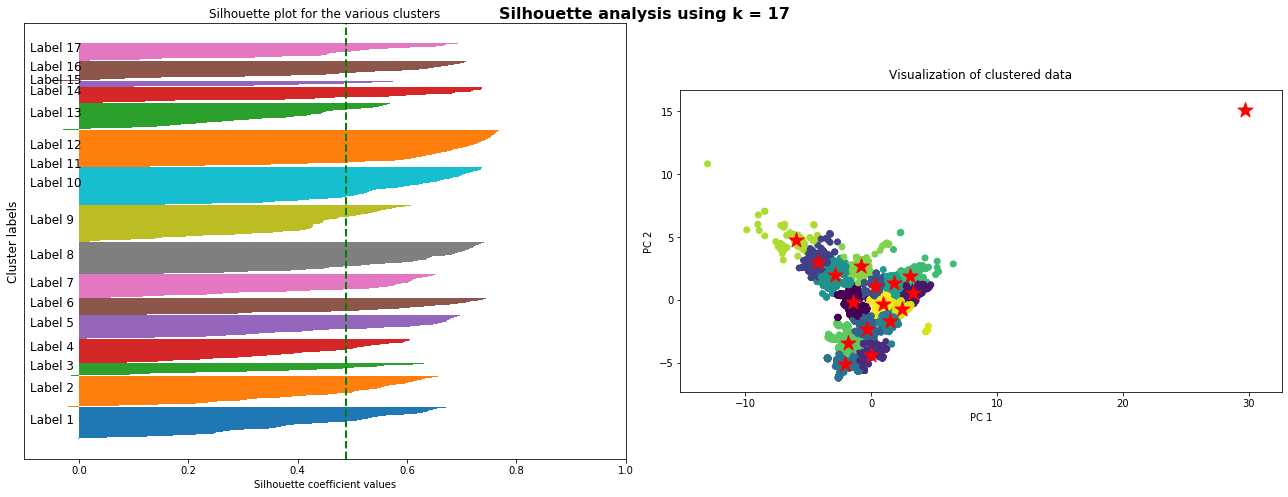

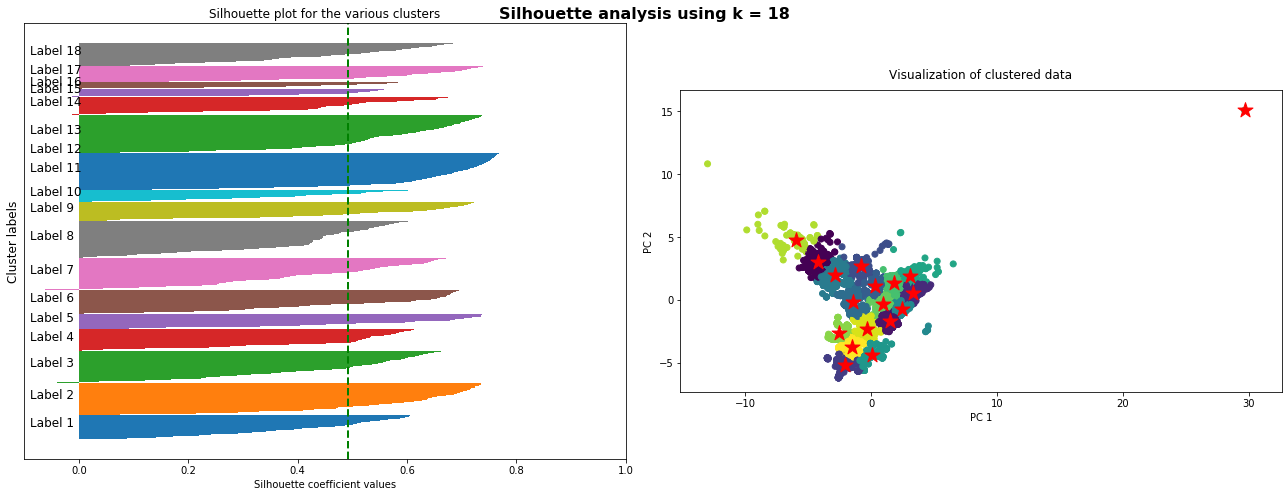

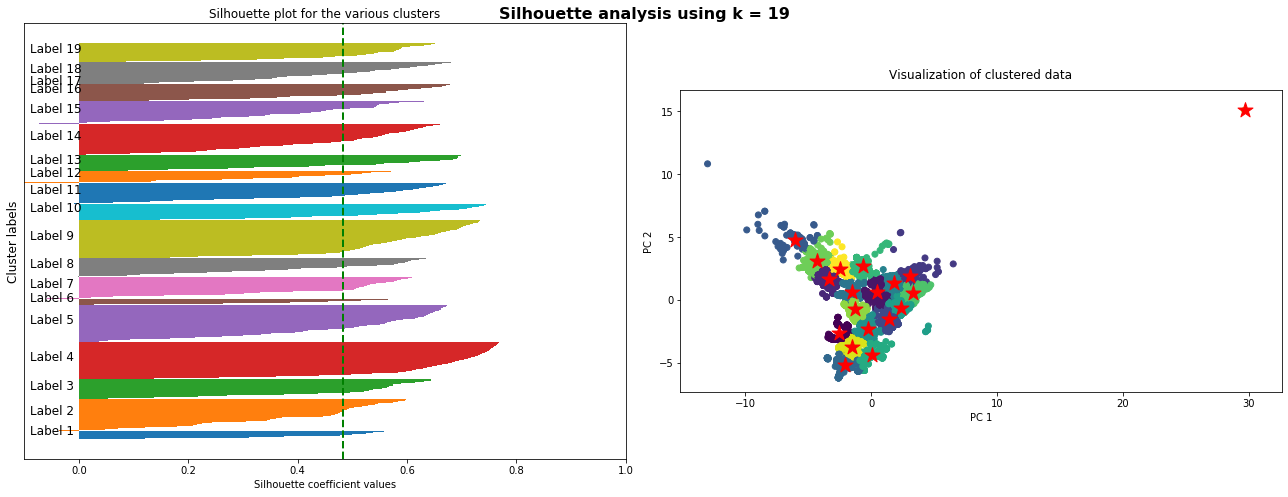

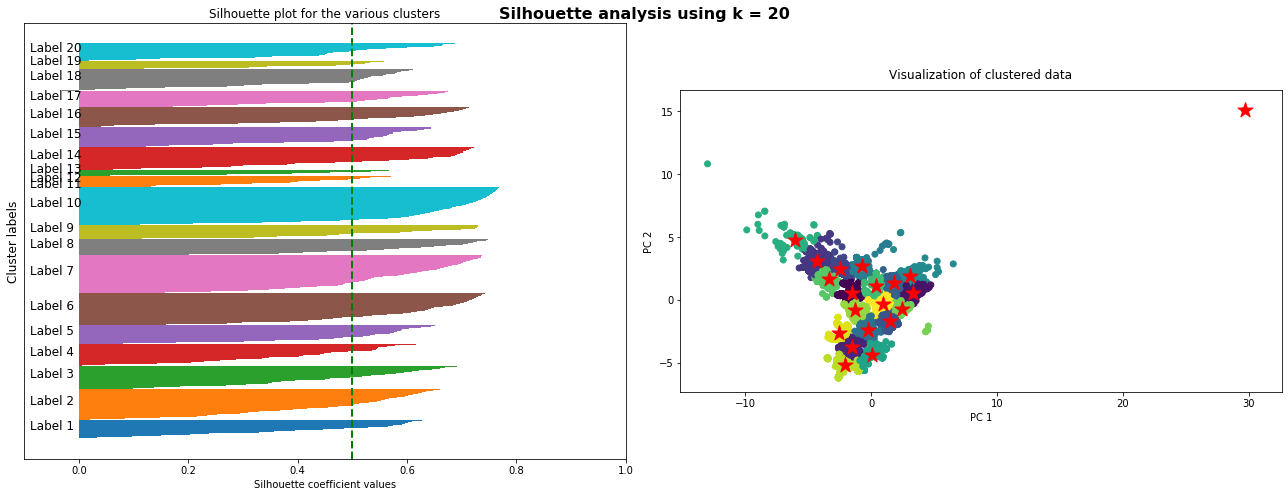

In [12]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate(list(range(2,21))):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(dums_pca)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dums_pca, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.09, (y_lower + y_upper) / 2, 'Label '+str(i + 1), fontsize = 12)
        y_lower += len(cluster_silhouette_vals)
    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels', fontsize = 12)
    ax1.set_title('Silhouette plot for the various clusters');
    
    # Scatter plot of data colored with labels
    ax2.scatter(dums_pca['PC1'], dums_pca['PC2'], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('PC 1')
    ax2.set_ylabel('PC 2')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle('Silhouette analysis using k = {}'.format(k),
                 fontsize=16, fontweight='semibold');

In [13]:
np.mean(silhouette_samples(dums_pca, labels))

0.4999785729857675

In [14]:
silhouette_samples(dums_pca, labels)

array([0.02469625, 0.53423588, 0.53423588, ..., 0.68233964, 0.64833915,
       0.7154622 ])

In [15]:
cluster_silhouette_vals

array([-0.00874871,  0.01177357,  0.01787486,  0.01787486,  0.01842625,
        0.02084175,  0.03468011,  0.04477681,  0.04610027,  0.04833157,
        0.05130337,  0.07436318,  0.07618024,  0.07618024,  0.08424056,
        0.08726135,  0.09307806,  0.09801116,  0.09961183,  0.1040513 ,
        0.1040513 ,  0.1040513 ,  0.1040513 ,  0.1040513 ,  0.1040513 ,
        0.1040513 ,  0.1040513 ,  0.1040513 ,  0.1040513 ,  0.11528631,
        0.11528631,  0.11528631,  0.11528631,  0.11528631,  0.14048472,
        0.14048472,  0.1424693 ,  0.14606409,  0.14647857,  0.14854623,
        0.14905149,  0.14967401,  0.15532461,  0.1755476 ,  0.1755476 ,
        0.22683678,  0.22683678,  0.22851314,  0.22977973,  0.24310953,
        0.24310953,  0.24310953,  0.24310953,  0.24310953,  0.27594597,
        0.27792623,  0.31328237,  0.31865817,  0.31865817,  0.32143082,
        0.32143082,  0.32603327,  0.32603327,  0.32603327,  0.32603327,
        0.32815225,  0.33546115,  0.33546115,  0.33742401,  0.34

## Evaluation DBSCAN with Silhoutte Index

In [16]:
from sklearn.metrics import silhouette_score
score = []

for num in range(2, 20):
    for eps in np.linspace(0.1, 1, 10): 
        dbscan = DBSCAN(eps=eps, min_samples = num).fit(dums_pca)
        labels = dbscan.labels_
        try:
            s_score = silhouette_score(dums_pca, labels)
            print('Average Silhoutte Score for eps = {} and min samples {} is {}'.format(eps, num, s_score))
            score.append({'min_sample': num, 'epsilon': eps, 'score': s_score})
        except:
            print('eps = {} and min samples {} result in only 1 Label'.format(eps, num))

Average Silhoutte Score for eps = 0.1 and min samples 2 is 0.28917635919327467
Average Silhoutte Score for eps = 0.2 and min samples 2 is -0.21579882082762344
Average Silhoutte Score for eps = 0.30000000000000004 and min samples 2 is -0.3785366659186302
Average Silhoutte Score for eps = 0.4 and min samples 2 is -0.5323913473229355
Average Silhoutte Score for eps = 0.5 and min samples 2 is -0.36521731623153725
Average Silhoutte Score for eps = 0.6 and min samples 2 is -0.22209895888838524
Average Silhoutte Score for eps = 0.7000000000000001 and min samples 2 is -0.07322836801616198
Average Silhoutte Score for eps = 0.8 and min samples 2 is 0.004325777465068974
Average Silhoutte Score for eps = 0.9 and min samples 2 is 0.06255083815458883
Average Silhoutte Score for eps = 1.0 and min samples 2 is 0.08186821923159182
Average Silhoutte Score for eps = 0.1 and min samples 3 is 0.28168621682326417
Average Silhoutte Score for eps = 0.2 and min samples 3 is -0.16882643734205016
Average Silhout

Average Silhoutte Score for eps = 0.1 and min samples 12 is 0.11959929631876026
Average Silhoutte Score for eps = 0.2 and min samples 12 is 0.05553246753854074
Average Silhoutte Score for eps = 0.30000000000000004 and min samples 12 is -0.14087647388616742
Average Silhoutte Score for eps = 0.4 and min samples 12 is -0.05063648375728504
Average Silhoutte Score for eps = 0.5 and min samples 12 is -0.007226099730627066
Average Silhoutte Score for eps = 0.6 and min samples 12 is 0.20548822221238863
Average Silhoutte Score for eps = 0.7000000000000001 and min samples 12 is 0.45671699641356045
Average Silhoutte Score for eps = 0.8 and min samples 12 is 0.4669066073959383
Average Silhoutte Score for eps = 0.9 and min samples 12 is 0.5051251547295157
Average Silhoutte Score for eps = 1.0 and min samples 12 is 0.5083808487033832
Average Silhoutte Score for eps = 0.1 and min samples 13 is 0.09006657411124208
Average Silhoutte Score for eps = 0.2 and min samples 13 is 0.0870361298015307
Average S

## Evaluation HDBSCAN with Silhoutte Index

In [ ]:
score = []
score_init = 0
for i in range(2, 50):
    for j in range(2, 50): 
        hdbscan = HDBSCAN(min_cluster_size=i, min_samples = j).fit(dums_pca)
        labels = hdbscan.labels_
        try:
            s_score = silhouette_score(dums_pca, labels)
            if s_score > score_init:
                score_init = s_score
                print('Average Silhoutte Score for cluster_size = {} and min samples {} is {}'.format(i, j, s_score))
                score.append({'min_sample': j, 'cluster_size': i, 'score': s_score})
        except:
            print('cluster_size = {} and min samples {} result in only 1 Label'.format(i, j))

Average Silhoutte Score for cluster_size = 2 and min samples 2 is 0.5115581455839534
